/Library/Python/2.7/site-packages/pytz/__init__.py:35: UserWarning: Module pyparsing was already imported from /Library/Python/2.7/site-packages/pyparsing.py, but /Library/Python/2.7/site-packages/pyparsing-1.5.7-py2.7.egg is being added to sys.path
  from pkg_resources import resource_stream


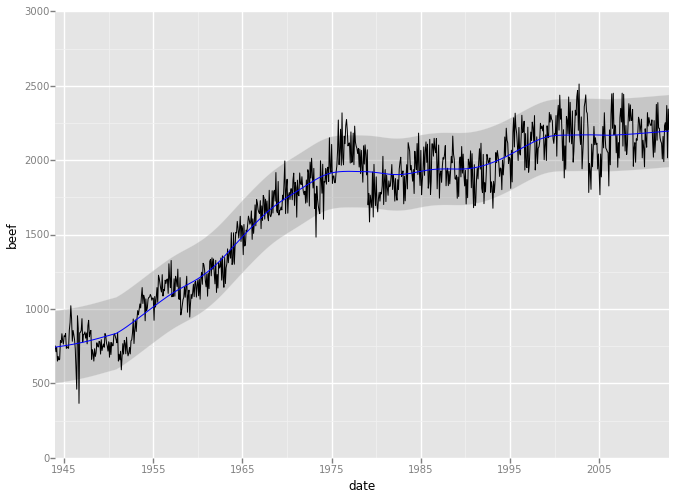

<ggplot: (291107849)>

In [1]:
%matplotlib inline

from ggplot import *

ggplot(aes(x='date', y='beef'), data=meat) +\
    geom_line() +\
    stat_smooth(colour='blue', span=0.2)

In [2]:
print meat

          date    beef   veal    pork  lamb_and_mutton  broilers  \
0   1944-01-01   751.0   85.0  1280.0             89.0       NaN   
1   1944-02-01   713.0   77.0  1169.0             72.0       NaN   
2   1944-03-01   741.0   90.0  1128.0             75.0       NaN   
3   1944-04-01   650.0   89.0   978.0             66.0       NaN   
4   1944-05-01   681.0  106.0  1029.0             78.0       NaN   
5   1944-06-01   658.0  125.0   962.0             79.0       NaN   
6   1944-07-01   662.0  142.0   796.0             82.0       NaN   
7   1944-08-01   787.0  175.0   748.0             87.0       NaN   
8   1944-09-01   774.0  182.0   678.0             91.0       NaN   
9   1944-10-01   834.0  215.0   777.0            100.0       NaN   
10  1944-11-01   786.0  197.0   944.0             91.0       NaN   
11  1944-12-01   764.0  146.0  1013.0             91.0       NaN   
12  1945-01-01   820.0  119.0  1037.0            100.0       NaN   
13  1945-02-01   816.0   97.0   724.0           

In [3]:
import glob, os
import pandas as pd

theFiles = glob.glob('data/*.csv')
print theFiles

df_list = []

for i in theFiles:
    df = pd.read_csv(i)
    
    #print df.head(10)
    df = df.T
    df.columns = ['error_rate']
    df['date'] = i.replace('data/output','').replace('.csv','')
    df['samp'] = df.index
    
    #print df.head(10)
    
#     for i in df.columns:
#         print  i
    
    df_list.append(df)

df = pd.concat(df_list)
 
df.head(45) #MAKE THIS LOOK LIKE MEAT date-and beef

['data/output2016-02-05-11-00-00.csv', 'data/output2016-02-05-11-41-39.csv', 'data/output2016-02-05-12-22-35.csv', 'data/output2016-02-05-13-03-28.csv', 'data/output2016-02-05-13-44-23.csv', 'data/output2016-02-05-14-25-49.csv', 'data/output2016-02-05-15-06-36.csv', 'data/output2016-02-05-15-47-17.csv', 'data/output2016-02-05-16-27-55.csv', 'data/output2016-02-05-17-09-15.csv']


,error_rate,date,samp
1000,0.1144,2016-02-05-11-00-00,1000
2000,0.0894,2016-02-05-11-00-00,2000
4000,0.0702,2016-02-05-11-00-00,4000
8000,0.0534,2016-02-05-11-00-00,8000
1000,0.1119,2016-02-05-11-41-39,1000
2000,0.0926,2016-02-05-11-41-39,2000
4000,0.0720,2016-02-05-11-41-39,4000
8000,0.0566,2016-02-05-11-41-39,8000
1000,0.1152,2016-02-05-12-22-35,1000
2000,0.0853,2016-02-05-12-22-35,2000


In [4]:
df['count'] = 1

dfg = df.groupby(['samp'],as_index=False).sum()

dfg['error_rate'] = dfg['error_rate'] / dfg['count']

dfg.head(10)

,samp,error_rate,count
0,1000,0.11471,10
1,2000,0.08724,10
2,4000,0.06922,10
3,8000,0.05479,10


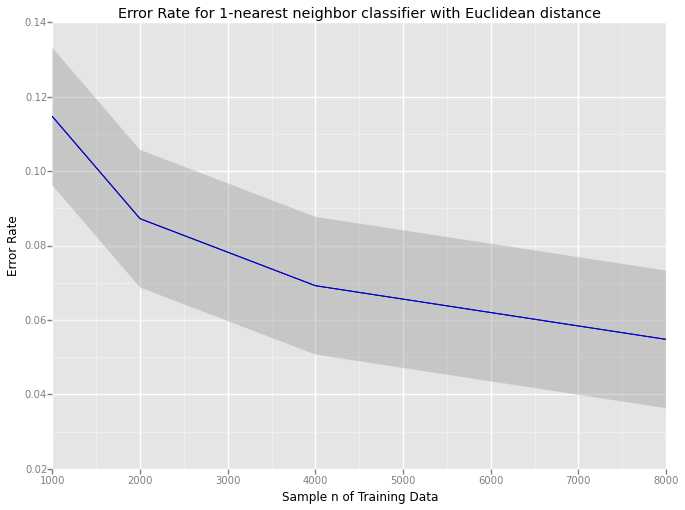

<ggplot: (288980605)>

In [6]:
ggplot(aes(x='samp', y='error_rate'), data=dfg) +\
    geom_line() +\
    stat_smooth(colour='blue', span=0.3) +\
    xlab("Sample n of Training Data") + ylab("Error Rate") +\
    ggtitle("Error Rate for 1-nearest neighbor classifier with Euclidean distance")

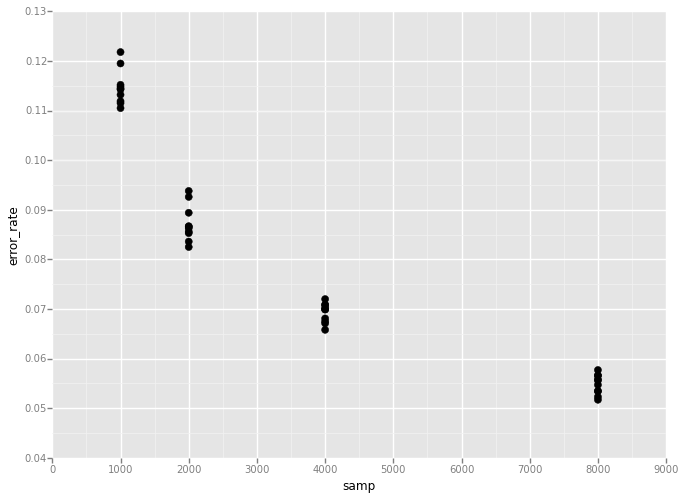

<ggplot: (284461493)>

In [7]:
ggplot(df, aes(x = 'samp', y = 'error_rate')) + geom_point(size=50) 

#p + geom_jitter()

In [8]:
ggplot(aes(x='samp', y='error_rate'), data=df) +\
    geom_line() +\
    stat_smooth(colour='blue', span=0.3) +\
    xlab("Sample n of Training Data") + ylab("Error Rate") +\
    ggtitle("Error Rate for 1-nearest neighbor classifier with Euclidean distance") + geom_errorbar(limits, width=0.2)

NameError: name 'geom_errorbar' is not defined

1.3.1
      error_rate  count
samp                   
1000     0.11471      1
2000     0.08724      1
4000     0.06922      1
8000     0.05479      1
      error_rate  count
samp                   
1000    0.003527      0
2000    0.003654      0
4000    0.001981      0
8000    0.002001      0


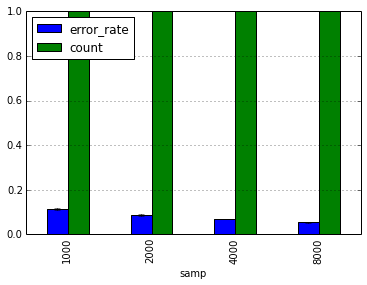

In [9]:
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.style.use('ggplot')

print matplotlib.__version__


gp3 = df.groupby('samp')#, 'word'))

means = gp3.mean()

errors = gp3.std()

print means


print errors

fig, ax = plt.subplots()

means.plot(yerr=errors, ax=ax, kind='bar')
